In [45]:
#import python librarires
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
#import excel file
df = pd.read_excel("Diwali Sale.xlsx")

In [47]:
# see the dataset
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [48]:
# to check the datatype of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [49]:
# check for null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [53]:
# drop blank/unusable columns
df = df.drop(["Status", "unnamed1"], axis = 1)

In [55]:
# drop null values
df = df.dropna()

In [56]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [51]:
# check the column name
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [58]:
# Display summary statistics (count, mean, std, min, max, quartiles) for Age, Orders, and Amount columns
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


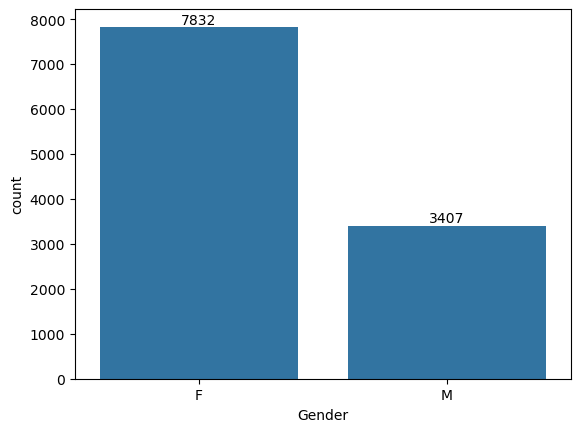

In [74]:
#Gender-wise Customer Count for Sales Analysis
ax = sb.countplot(x = "Gender", data =df)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

In [75]:
# Group by gender to see sum of sales
df.groupby("Gender").agg({"Amount" : "sum"})


,Amount
Gender,
F,74335856.43
M,31913276.00


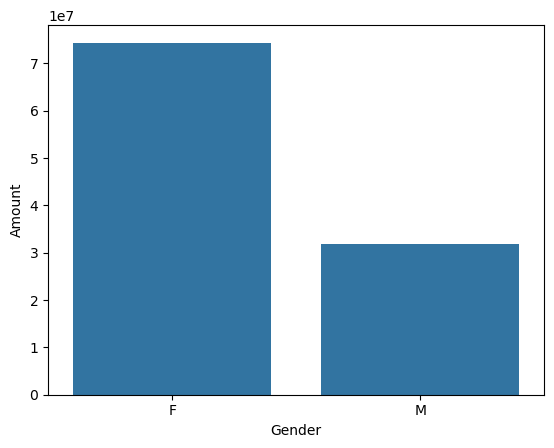

In [76]:
# Total sale by Gender (male & female)
sale = df.groupby("Gender").agg({"Amount" : "sum"})
sb.barplot( x = "Gender", y = "Amount", data = sale)
plt.show()

### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

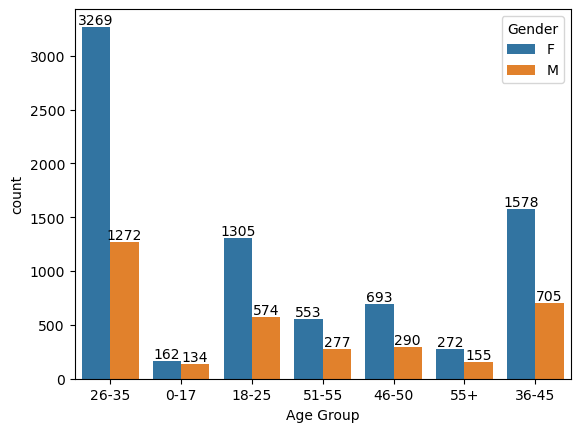

In [80]:
# Plotting a countplot of Age Group with Gender as hue and displaying counts on each bar
ax = sb.countplot(x = "Age Group", data = df, hue = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [84]:
# Group by Age group
df.groupby("Age Group").agg({"Amount" : "sum"})

,Amount
Age Group,
0-17,2699653.00
18-25,17240732.00
26-35,42613443.94
36-45,22144995.49
46-50,9207844.00
51-55,8261477.00
55+,4080987.00


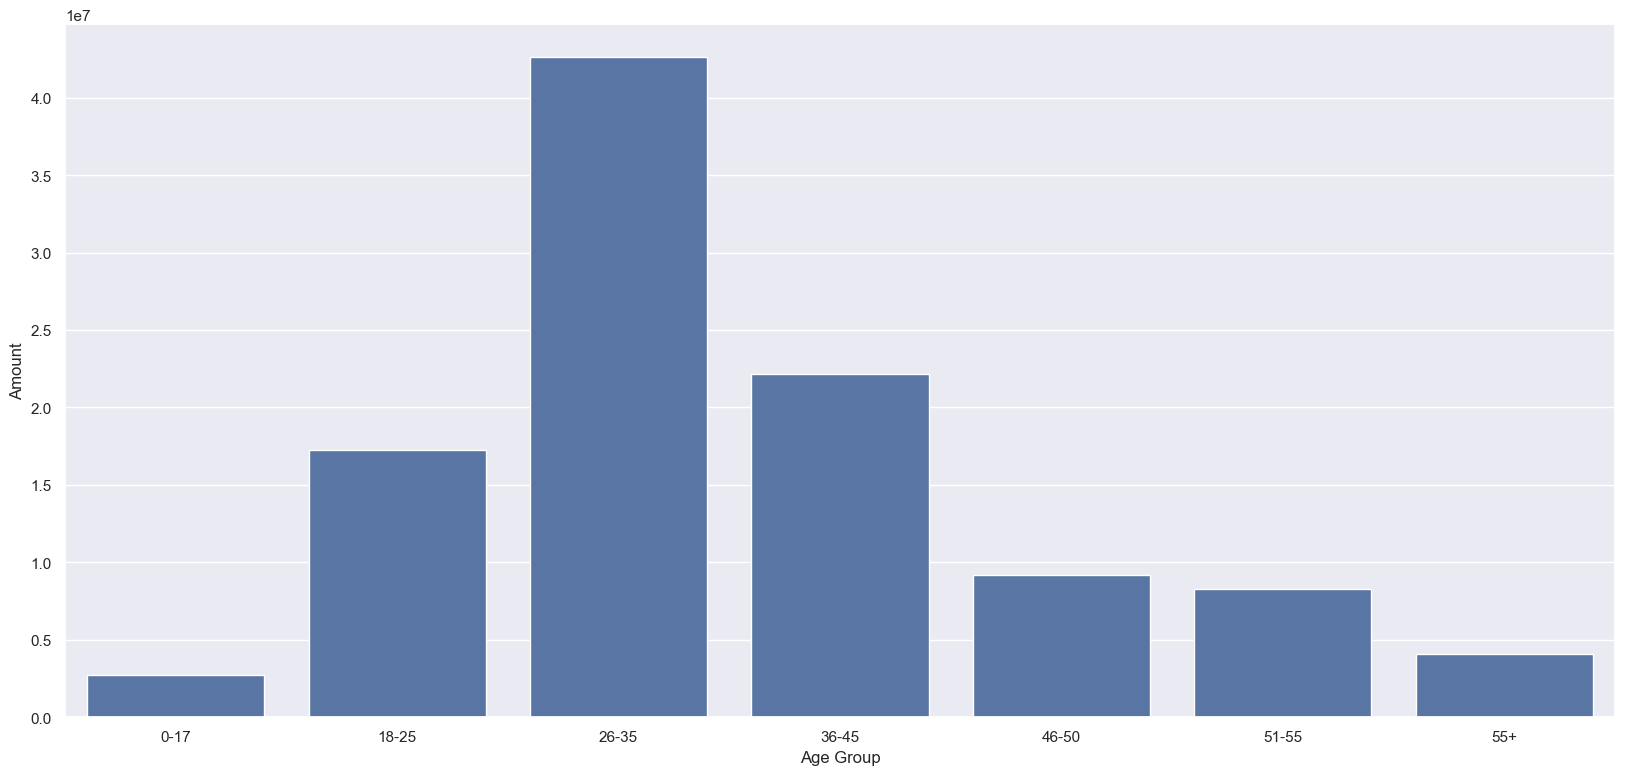

In [87]:
# Total sales amount per Age Group
sale = df.groupby("Age Group").agg({"Amount" : "sum"})
sb.barplot( x = "Age Group", y = "Amount", data = sale)
plt.show()

### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

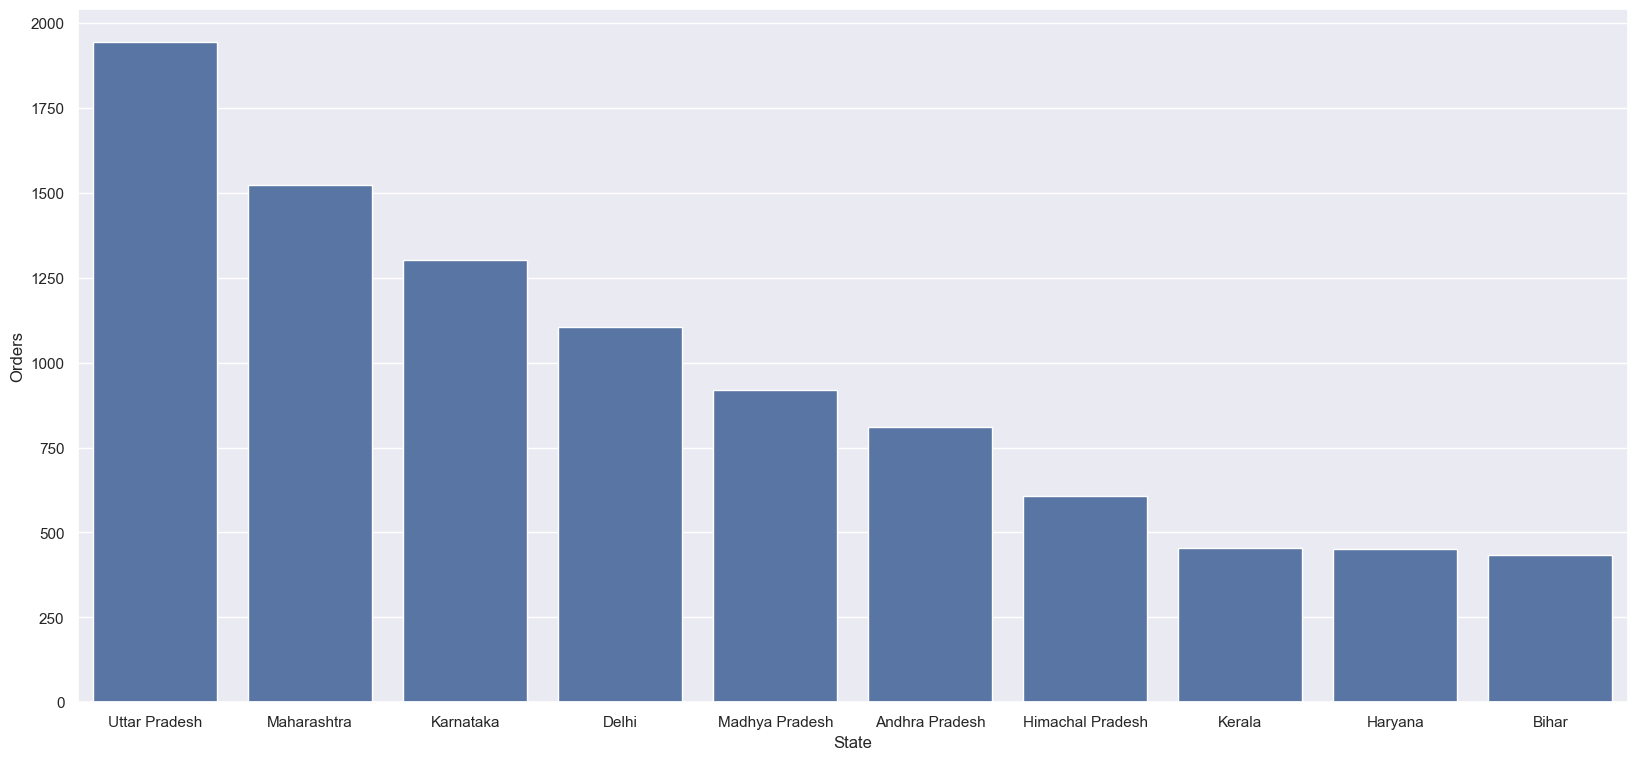

In [134]:
# Top 10 states by total number of orders
sale = df.groupby("State").agg({"Orders" : "count"}).sort_values(by = "Orders", ascending = False).head(10)
sb.set(rc = {'figure.figsize': (20,9)})
sb.barplot( x = "State", y = "Orders", data = sale)
plt.show()

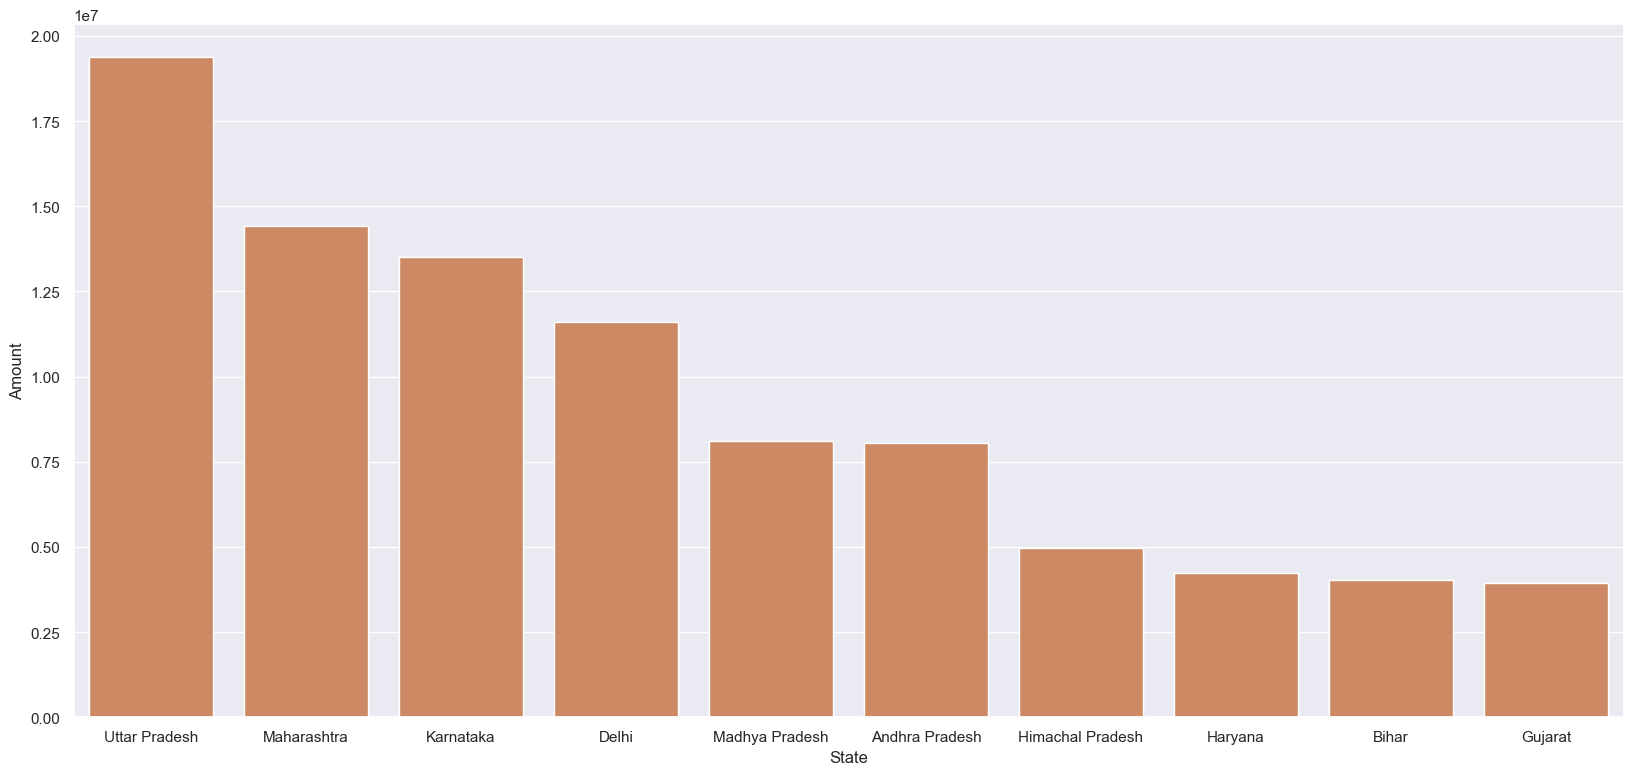

In [94]:
# Top 10 states with the highest total sales amount
sale = df.groupby("State").agg({"Amount" : "sum"}).sort_values(by = "Amount", ascending = False).head(10)
sb.set(rc = {'figure.figsize': (20,9)})
sb.barplot( x = "State", y = "Amount", data = sale)
plt.show()

### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

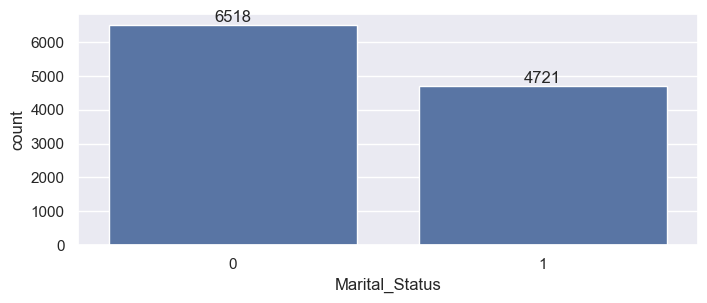

In [97]:
# Bar chart showing number of customers in each Marital Status category

sb.set(rc = {'figure.figsize': (8,3)})

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

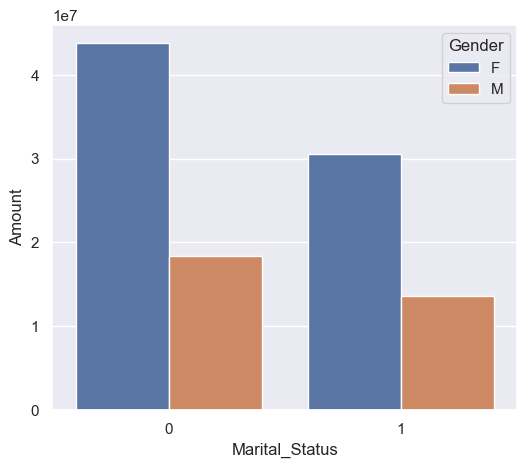

In [102]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sb.set(rc={'figure.figsize':(6,5)})
sb.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

In [103]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

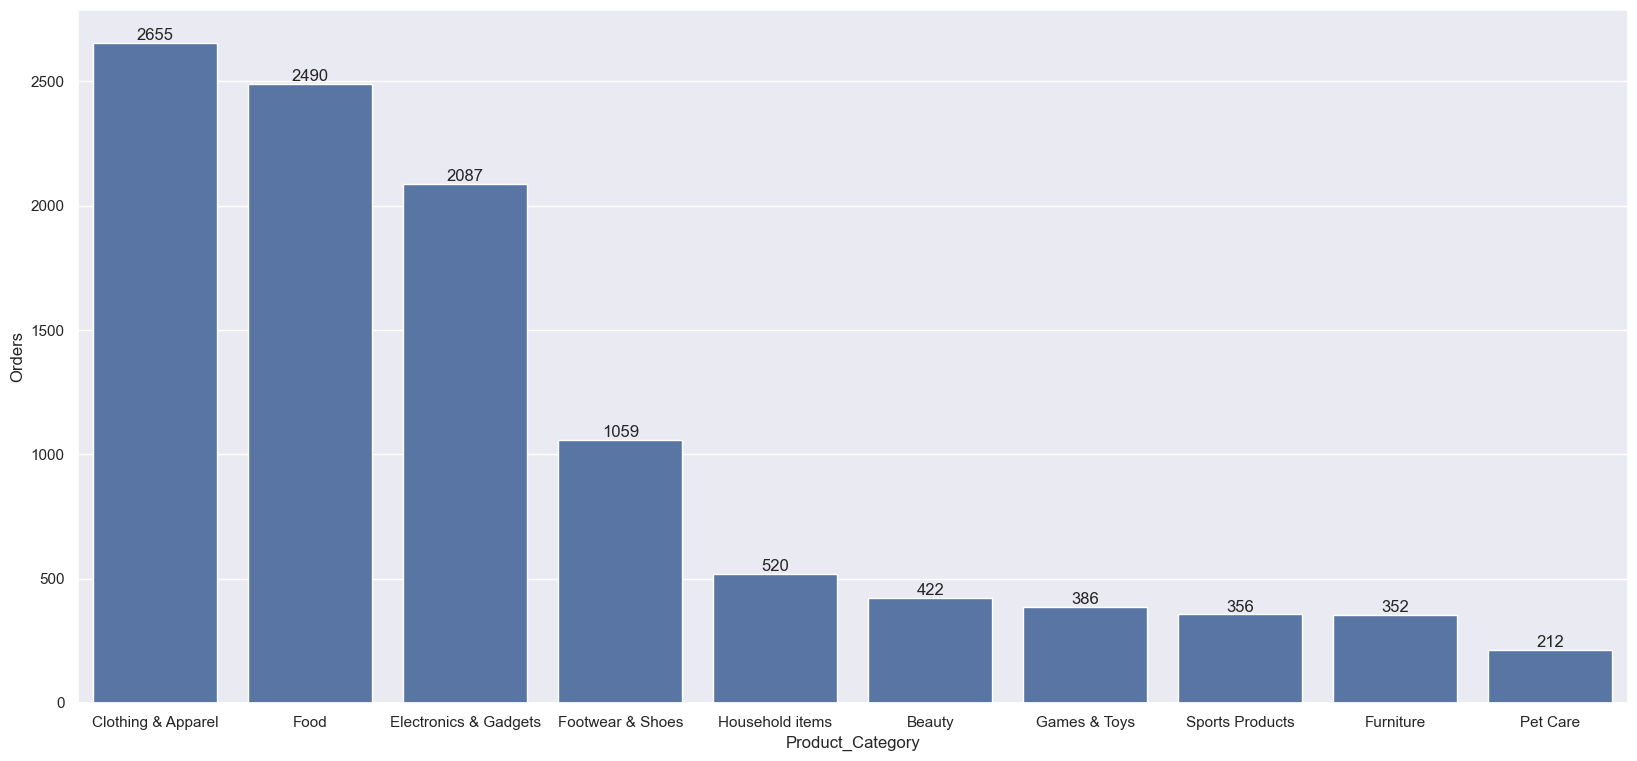

In [142]:
sale = df.groupby("Product_Category").agg({"Orders" : "count"}).sort_values(by = "Orders", ascending = False).head(10)
sb.set(rc = {'figure.figsize': (20,9)})
ax = sb.barplot( x = "Product_Category", y = "Orders", data = sale)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

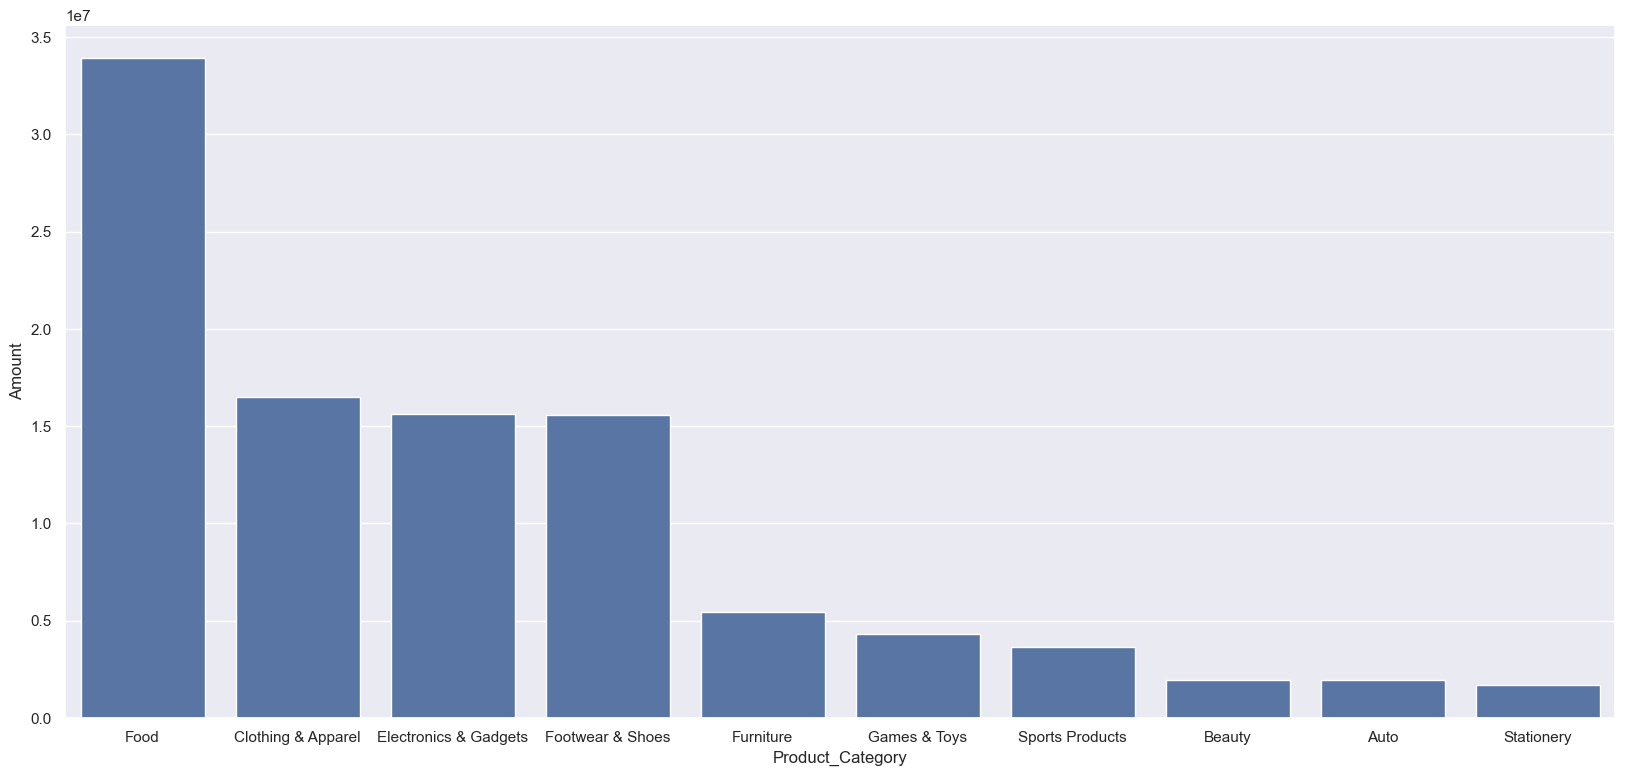

In [145]:
sale = df.groupby("Product_Category").agg({"Amount" : "sum"}).sort_values(by = "Amount", ascending = False).head(10)
sb.set(rc = {'figure.figsize': (20,9)})
ax = sb.barplot( x = "Product_Category", y = "Amount", data = sale)
plt.show()

### From the above graphs, we can see that most of the orders were in the Clothing & Apparel category, while the highest total sales/amount came from the Food category.